# NASA - Nearest Earth Objects

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('neo_v2.csv')

In [5]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [37]:
df.drop(['id','name','sentry_object','orbiting_body'],axis=1,inplace=True) #removing usless columns

We have removed the 'sentry_object' columns because all entries were false in it. it would have been of no use.


In [16]:
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


# Exploratory Data Analysis

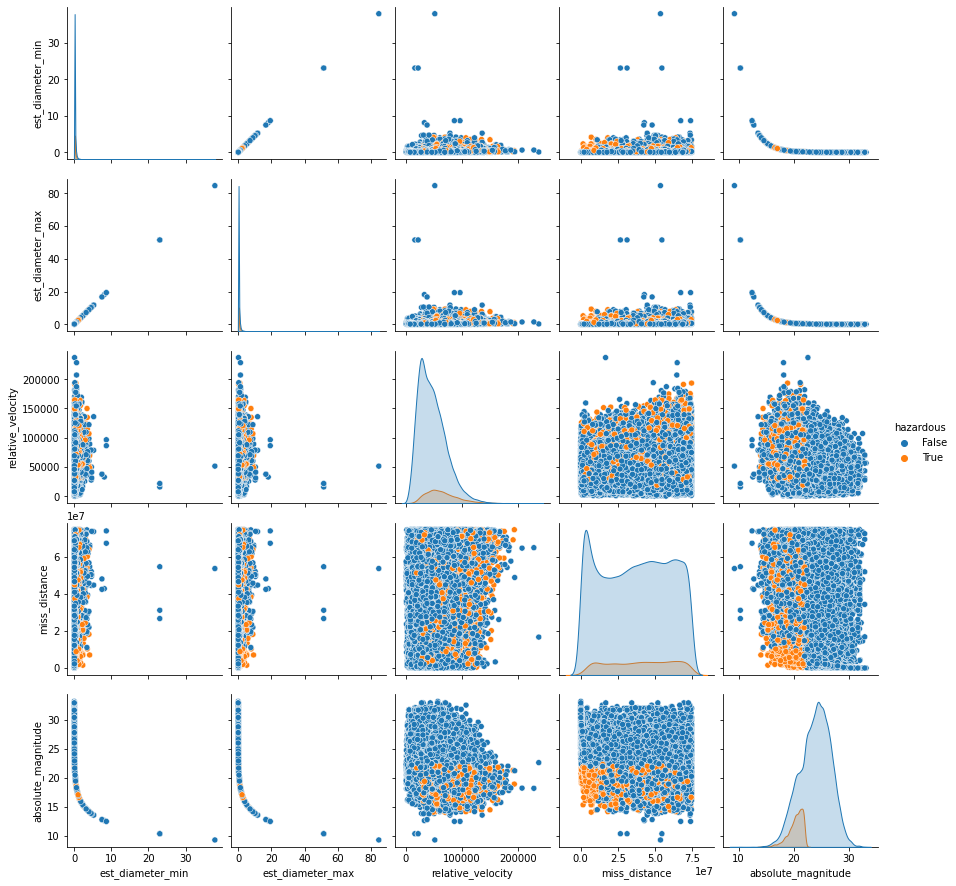

In [10]:
sns.pairplot(df,hue='hazardous')

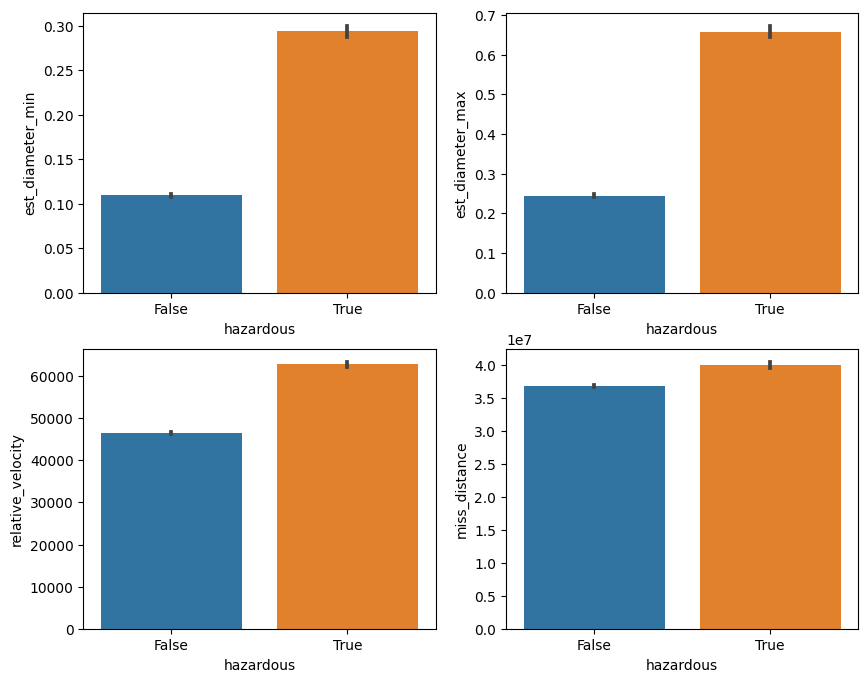

In [18]:
cols = ['est_diameter_min', 'est_diameter_max', 'relative_velocity','miss_distance']
plt.figure(figsize=(10,8))
c=1
for i in cols:
    plt.subplot(2,2,c)
    sns.barplot(data=df,x='hazardous',y=i)
    c+=1
#sns.barplot(data=df,x='hazardous',y='miss_distance')

Here we can see, how an object can be hazardous for the earth based on the metric of size, velocity and distance that we got from the dataset.

<AxesSubplot:>

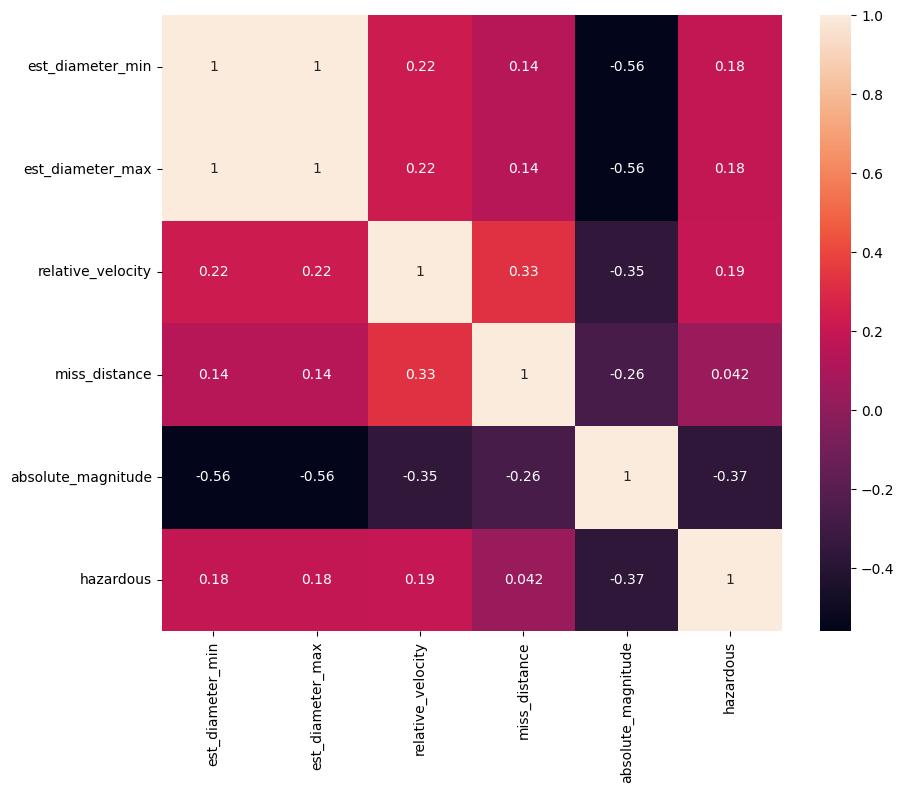

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Here we can see that columns 'est_diameter_min' and 'est_diameter_max' are completely correlated to each other. Therefore we should drop any of the one as it would not cause problem.

In [38]:
df.drop('est_diameter_max',axis=1,inplace=True)

<AxesSubplot:>

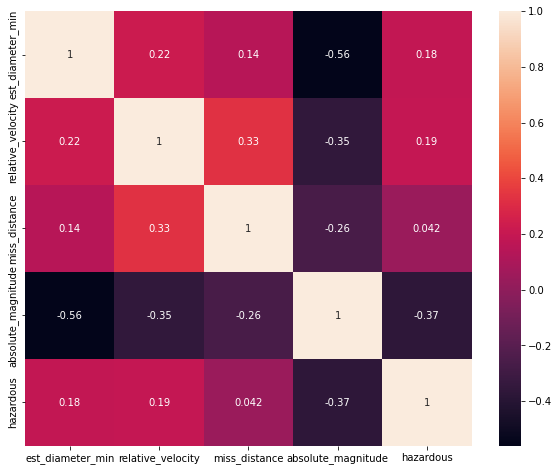

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

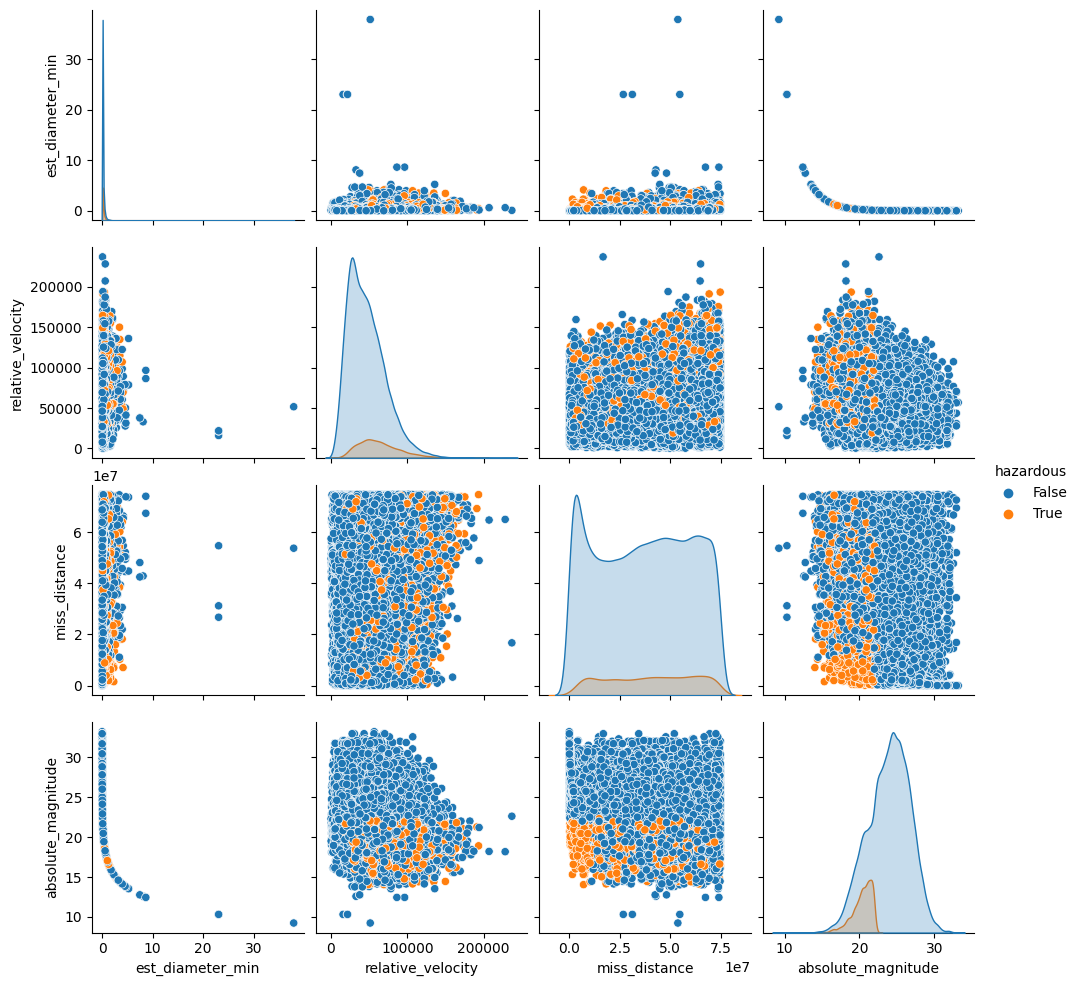

In [31]:
sns.pairplot(df,hue='hazardous')

<AxesSubplot:xlabel='absolute_magnitude', ylabel='Count'>

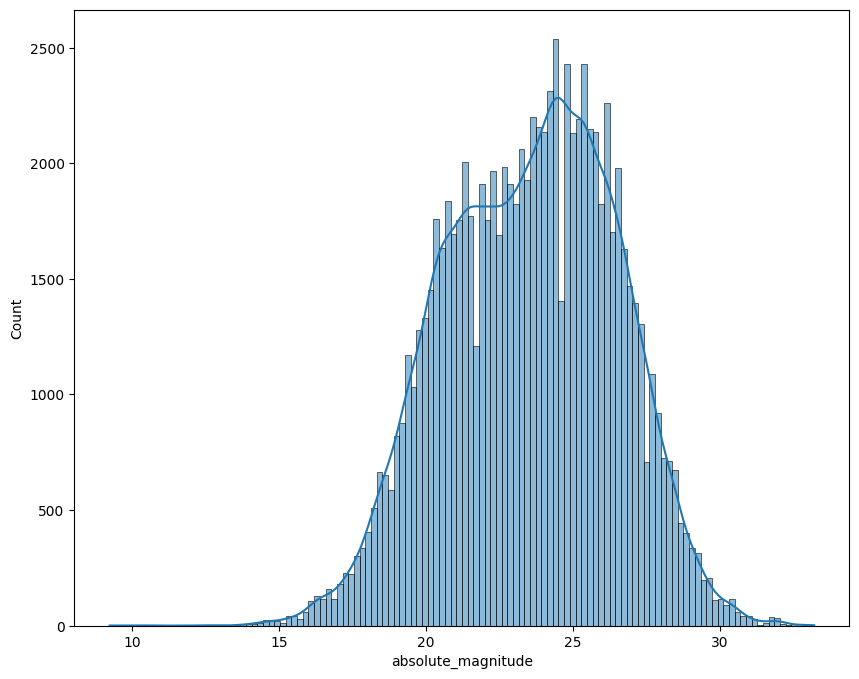

In [44]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='absolute_magnitude',kde=True)

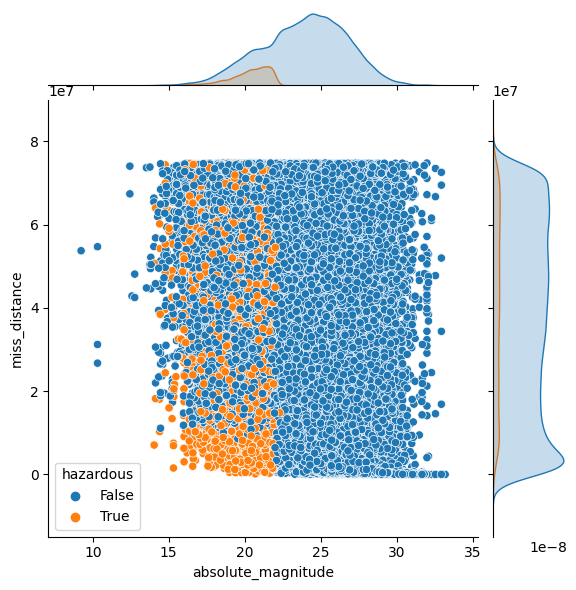

In [46]:
sns.jointplot(data=df,x='absolute_magnitude',y='miss_distance',hue='hazardous')

# Prediction

## Final df to use after cleaning

In [47]:
df.head()

,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,13569.249224,5.483974e+07,16.73,False
1,0.265800,73588.726663,6.143813e+07,20.00,True
2,0.722030,114258.692129,4.979872e+07,17.83,False
3,0.096506,24764.303138,2.543497e+07,22.20,False
4,0.255009,42737.733765,4.627557e+07,20.09,True


In [49]:
df.columns

Index(['est_diameter_min', 'relative_velocity', 'miss_distance',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()
scaler.fit(df[['est_diameter_min', 'relative_velocity', 'miss_distance',
       'absolute_magnitude']])
scaled = scaler.transform(df[['est_diameter_min', 'relative_velocity', 'miss_distance',
       'absolute_magnitude']])

In [41]:
scaled_df = pd.DataFrame(scaled)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = scaled_df
y=df['hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
pred = rfc.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [47]:
print(classification_report(y_test,pred),'\n\n',confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

       False       0.94      0.97      0.95     24597
        True       0.61      0.38      0.47      2654

    accuracy                           0.92     27251
   macro avg       0.77      0.68      0.71     27251
weighted avg       0.90      0.92      0.91     27251
 

 [[23955   642]
 [ 1651  1003]]


In [48]:
print(np.round(accuracy_score(y_test,pred)*100,2))

91.59


With an accuracy 91.6%, this concludes my kernel for the dataset. Although I am open to suggestions how can I improve the True prediction. The data for True is less but I'm sure there must be a way to improve its precision. Please comment any suggestion.

# Thankyou :)